# Nithya Ramesh

# Data Science and Business Analytics intern
# @The Sparks Foundation(TSF)

# Task 2 (Prediction Using Unsupervised ML)

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


#### Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#### Reading and Displaying Dataset

In [2]:
iris=datasets.load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data.shape

(150, 4)

#### Statistical Information of the dataframe

In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#### Using elbow method to find the optimum no. of clusters and k value

In [6]:
x=data.iloc[:,[0,1,2,3]].values

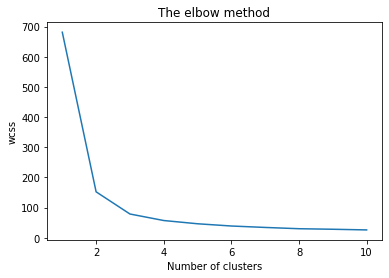

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)    
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

####  Representation of clusters visually

In [8]:
km=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_pred=km.fit_predict(x)

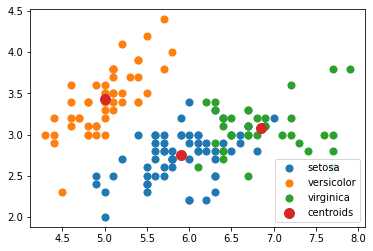

In [9]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=50,label='setosa')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=50,label='versicolor')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=50,label='virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,label='centroids')
plt.legend()